In [1]:
from src.data.get_data_coinglass import load_data_for_exchange_pair, compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics, calculate_max_drawdown, analyze_venue_switching_strategy




# Example usage
api_key = "5a7e3eb1256241899a54cd41cfd38825"
start_date = "2023-01-01"
end_date = "2024-12-31"
limit = 1000
interval = "4h"

api = CoinGlassAPI(api_key)



In [3]:

# Load BTC data (Here from Binance)


btc_data = load_data_for_exchange_pair(api, "Binance", "BTCUSDT",  "Binance", "BTCUSDT", start_date,end_date,interval,limit, True)





print(btc_data)

# Load ETH data

eth_data = load_data_for_exchange_pair(api, "Binance", "ETHUSDT",  "Binance", "ETHUSDT", start_date,end_date,interval,limit, True)



print(eth_data)


                   date   timestamp  closePrice spot_exchange spot_symbol  \
0   2024-10-25 20:00:00  1729886400    66698.33       Binance     BTCUSDT   
1   2024-10-26 00:00:00  1729900800    66914.00       Binance     BTCUSDT   
2   2024-10-26 04:00:00  1729915200    67007.99       Binance     BTCUSDT   
3   2024-10-26 08:00:00  1729929600    67138.00       Binance     BTCUSDT   
4   2024-10-26 12:00:00  1729944000    66886.49       Binance     BTCUSDT   
..                  ...         ...         ...           ...         ...   
392 2024-12-30 04:00:00  1735531200    93731.65       Binance     BTCUSDT   
393 2024-12-30 08:00:00  1735545600    93923.14       Binance     BTCUSDT   
394 2024-12-30 12:00:00  1735560000    92130.21       Binance     BTCUSDT   
395 2024-12-30 16:00:00  1735574400    94417.04       Binance     BTCUSDT   
396 2024-12-30 20:00:00  1735588800    92792.05       Binance     BTCUSDT   

     fundingRate perp_exchange perp_symbol  
0       0.004740       Binance

In [4]:
import pandas as pd

exchanges = ['Binance', 'Bybit', 'OKX']
include_list =  ['BTC', 'ETH']
exclude_list = ['XBT/USD', 'XBT/USD', 'BTC-USD', 'ETH-USD', 'BTC_USD', 'ETH_USD', 'ETH/USD'] #exclude weorg instrument, keep USDT feeds, why kraken uses XBT for BTC ticker i dunno but fuck them
ticker_map_spot = CoinGlassAPI(api_key).get_supported_tickers(include_list, exclude_list) #get tickers for spot
ticker_map_futures = CoinGlassAPI(api_key).get_supported_tickers(
    include_list, exclude_list, futures=True
) #get tickers for futures

df_ticker_spot = ticker_map_spot.rename(columns={'instrumentId': 'spotInstrumentId'})
print(df_ticker_spot)
df_ticker_spot.to_csv("ticker_map_spot.csv", index=False)
df_ticker_futures = ticker_map_futures.rename(columns={'instrumentId': 'futuresInstrumentId'})
print(df_ticker_futures)
df_ticker_futures.to_csv("ticker_map_futures.csv", index=False)

# merged_ticker_df = pd.merge(df_ticker_spot, df_ticker_futures, on=['exchange', 'baseAsset'], how='outer')

# # WIP, keep only perps tickers, remove futures tickers
# print(merged_ticker_df)
# for _, row in ticker_map.iterrows():
#     exchange = row['exchange']
#     ticker = row['instrumentId']
    
#     print(f"Ticker for {exchange}: {ticker}")
    
#     if ticker:
#         df = compute_funding_performance(
#             api_key=api_key,
#             symbol=ticker,
#             start_str=start_date,
#             end_str=end_date,
#             interval=interval,
#             limit=1000,
#             exchanges=[exchange],
#             position_size=1
#         )
#         print(df.head())





      exchange baseAsset spotInstrumentId
0      Binance       BTC          BTCUSDT
1      Binance       ETH          ETHUSDT
2     Bitfinex       BTC           BTCUSD
3     Bitfinex       ETH           ETHUSD
4        Bybit       BTC          BTCUSDT
5        Bybit       ETH          ETHUSDT
6     Coinbase       BTC         BTC-USDT
7     Coinbase       ETH         ETH-USDT
8   Crypto.com       BTC         BTC_USDT
9   Crypto.com       ETH         ETH_USDT
10      Kraken       ETH         ETH/USDT
11      Kraken       BTC         XBT/USDT
12         OKX       BTC         BTC-USDT
13         OKX       ETH         ETH-USDT
     exchange baseAsset futuresInstrumentId
0     Binance       BTC         BTCUSD_PERP
1     Binance       BTC       BTCUSD_250627
2     Binance       BTC       BTCUSD_250926
3     Binance       ETH         ETHUSD_PERP
4     Binance       ETH       ETHUSD_250627
..        ...       ...                 ...
178       OKX       ETH     ETH-USDT-250926
179       OKX     

In [5]:
base_asset = "BTCUSDT"
start_str = "2023-01-01"
end_str = "2024-12-31"
position_size = 1  # Example
limit = 1000
interval = "4h"

# Compute performance across exchanges
performance_df = compute_funding_performance_multi_exchange(
    api_key, 
    start_str, 
    end_str, 
    interval, 
    limit, 
    position_size
)

performance_df.to_csv("carry_performance.csv", index=False)

if not performance_df.empty:
    # Calculate performance metrics
    metrics_df = calculate_performance_metrics(performance_df, interval)
    print("\nPerformance Metrics by Exchange Pair:")
    print(metrics_df)
    
    # Analyze venue switching strategy
    switching_analysis = analyze_venue_switching_strategy(metrics_df)
    print("\nVenue Switching Analysis:")
    print(switching_analysis)
    
    # Save results
    performance_df.to_csv(f'{base_asset}_carry_performance.csv', index=False)
    metrics_df.to_csv(f'{base_asset}_carry_metrics.csv', index=False)
    switching_analysis.to_csv(f'{base_asset}_venue_switching_analysis.csv', index=False)


Processing perpetual futures on Binance for BTCUSDT
Pairing with spot data from Binance for BTCUSDT
Pairing with spot data from Bitfinex for BTCUSD
Pairing with spot data from Bybit for BTCUSDT
Pairing with spot data from Coinbase for BTC-USDT
Pairing with spot data from Crypto.com for BTC_USDT
Pairing with spot data from Kraken for XBT/USDT
Pairing with spot data from OKX for BTC-USDT

Processing perpetual futures on Binance for ETHUSDT
Pairing with spot data from Binance for ETHUSDT
Pairing with spot data from Bitfinex for ETHUSD
Pairing with spot data from Bybit for ETHUSDT
Pairing with spot data from Coinbase for ETH-USDT
Pairing with spot data from Crypto.com for ETH_USDT
Pairing with spot data from Kraken for ETH/USDT
Pairing with spot data from OKX for ETH-USDT

Processing perpetual futures on BingX for BTC-USDT
Pairing with spot data from Binance for BTCUSDT
Pairing with spot data from Bitfinex for BTCUSD
Pairing with spot data from Bybit for BTCUSDT
Pairing with spot data fro

TypeError: Could not convert ['BinanceBinanceBinanceBinance' 'BTCUSDTBTCUSDTETHUSDTETHUSDT'
 'BinanceBingXBinanceBingX' 'BTCUSDTBTC-USDTETHUSDTETH-USDT'] to numeric

Calculate Strategy Statistics

For the 2021 Bull Run (2020-06-29_to_2021-11-14)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2020-06-29_to_2021-11-13.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2020-06-29_to_2021-11-13.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2020-06-29_to_2021-11-13.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2020-06-29_to_2021-11-13.csv

Data separation complete!


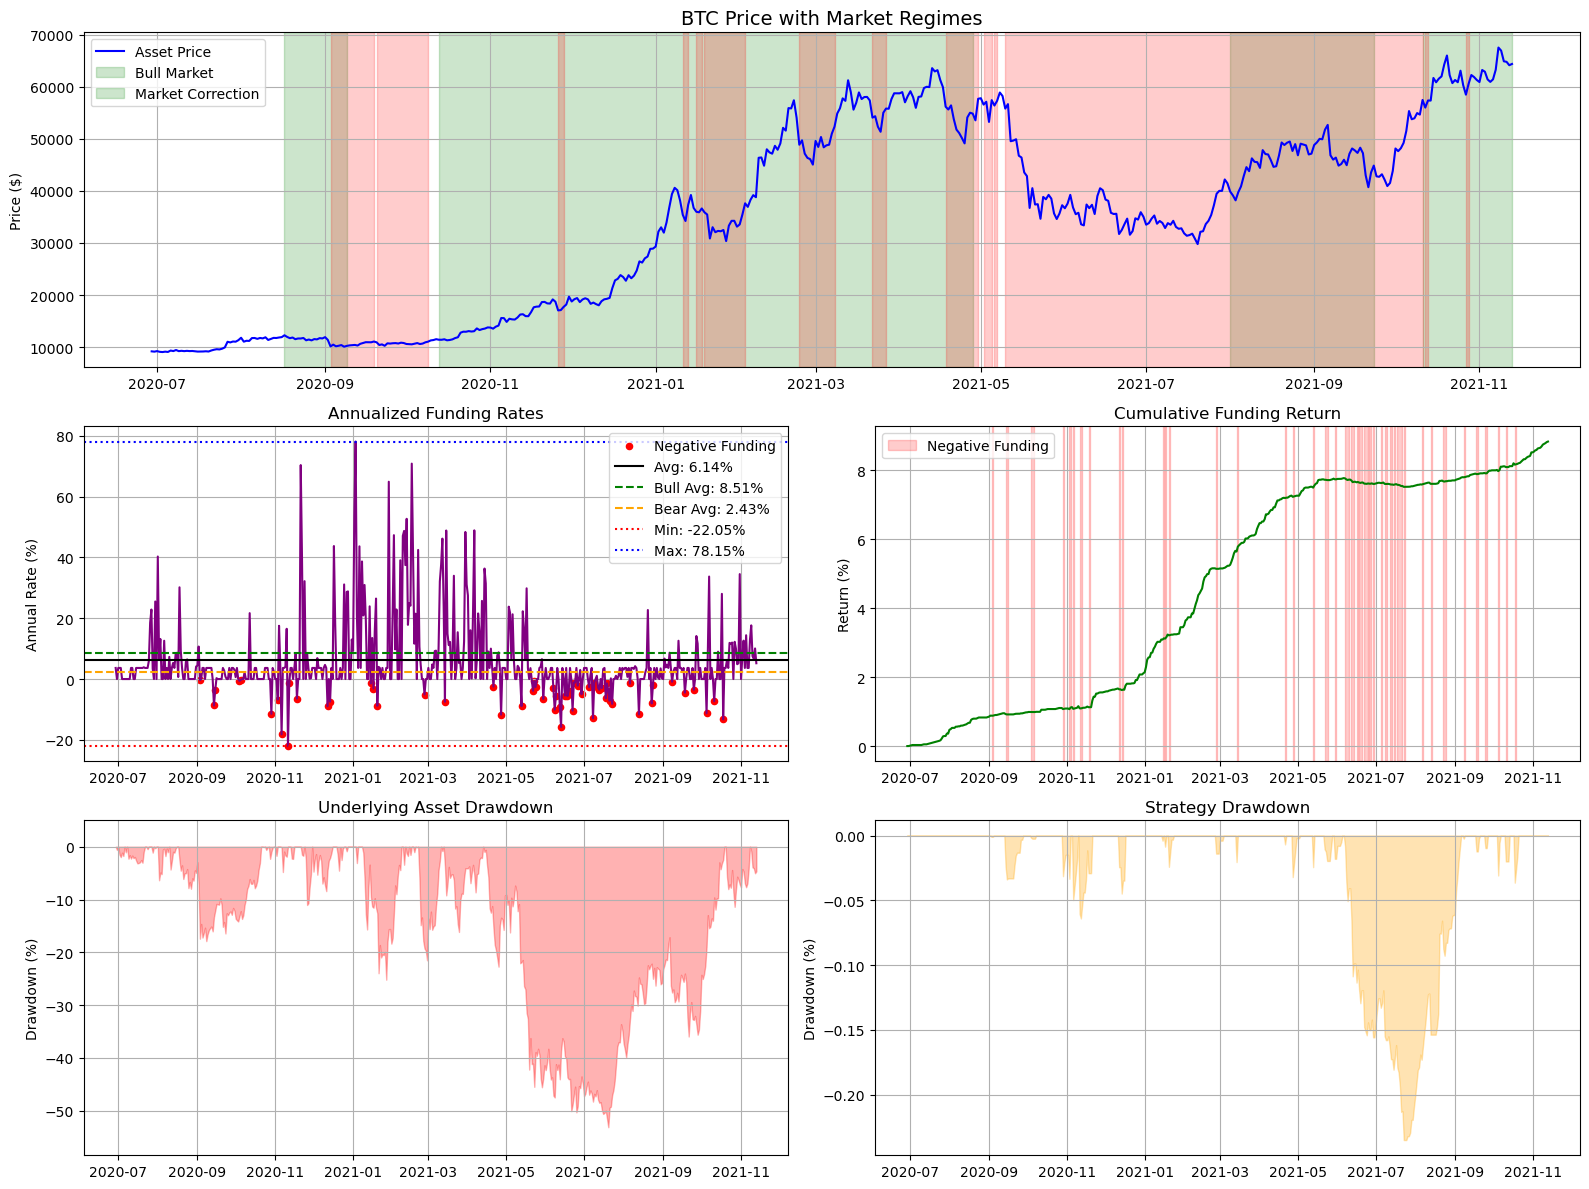

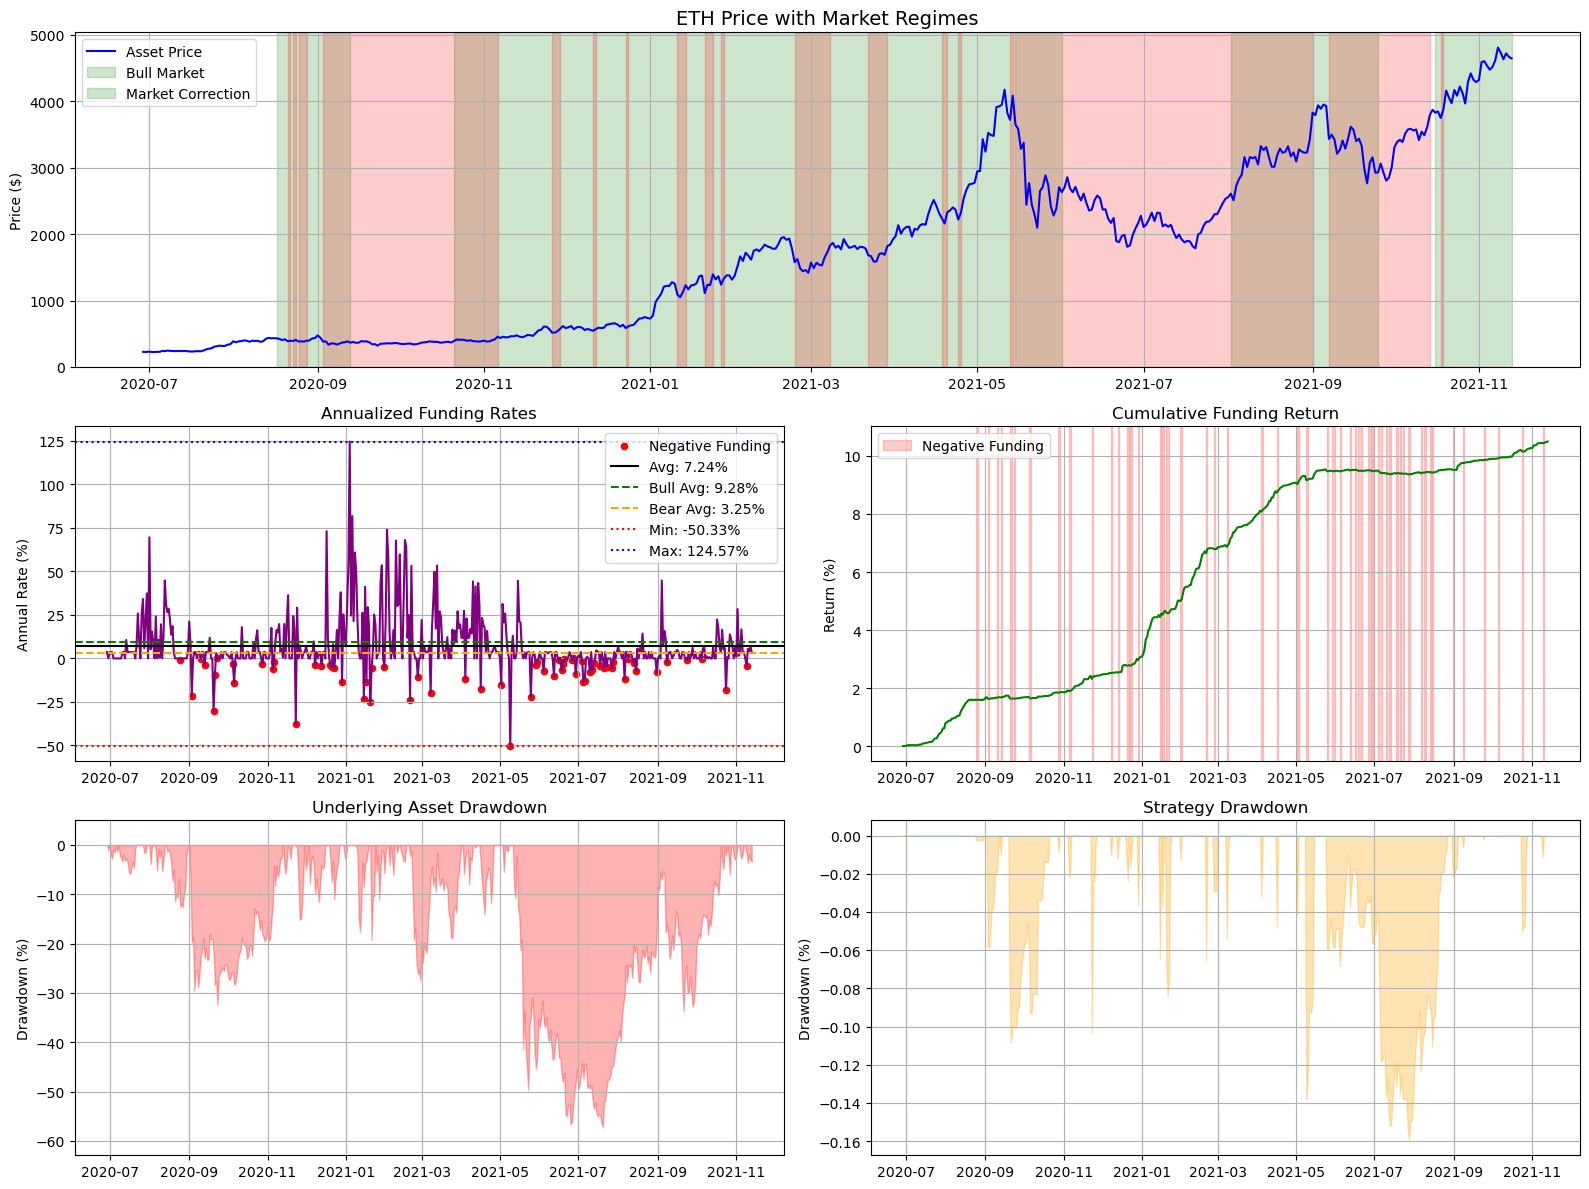

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2020-06-29,2020-06-29
2,End Date,2021-11-13,2021-11-13
3,Total Days,502,502
4,Years,1.3753424657534246,1.3753424657534246
5,Price Information,,None
6,Entry Price,9192.56,227.93
7,Exit Price,64380.00,4644.28
8,Underlying Asset Performance,,None
9,Total Return,600.35%,1937.59%


In [7]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2020-06-29_to_2021-11-14.csv'
futures_file_path = 'data/concat/futures_data_2020-06-29_to_2021-11-14.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


For the Luna Collapse (2022-03-09_to_2022-06-09)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2022-03-09_to_2022-06-08.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2022-03-09_to_2022-06-08.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2022-03-09_to_2022-06-08.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2022-03-09_to_2022-06-08.csv

Data separation complete!


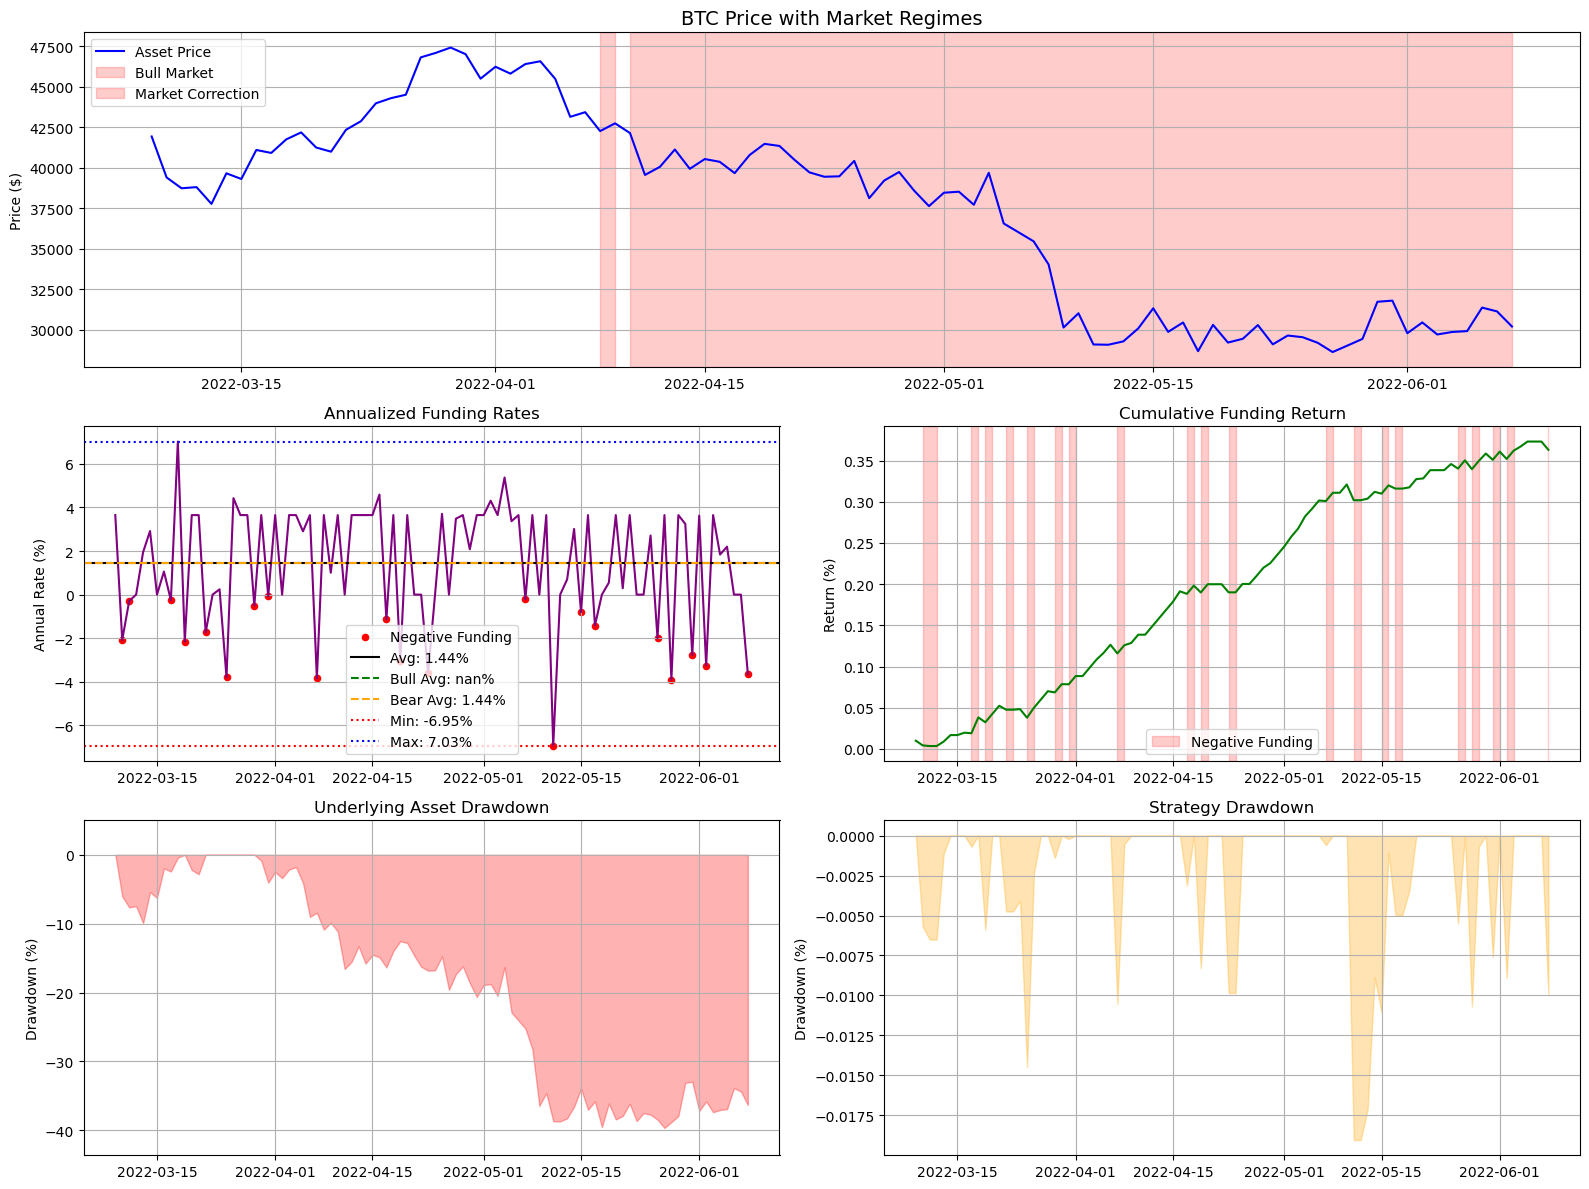

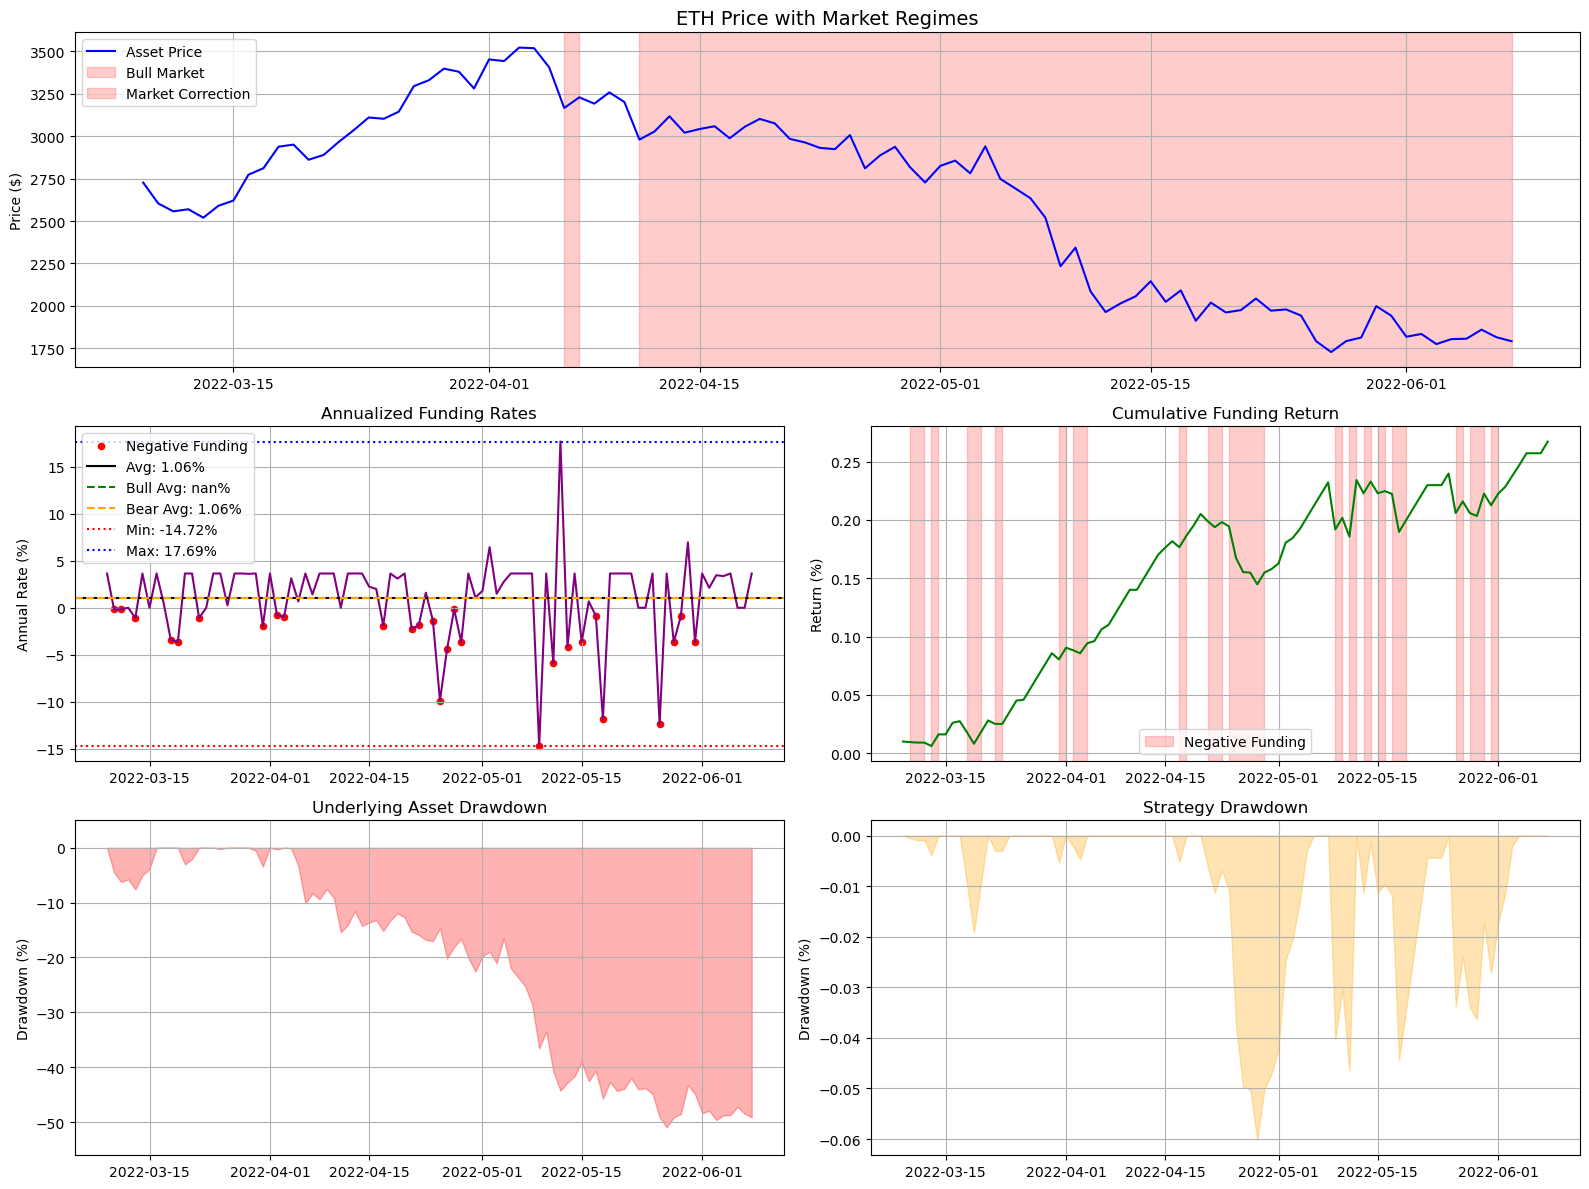

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2022-03-09,2022-03-09
2,End Date,2022-06-08,2022-06-08
3,Total Days,91,91
4,Years,0.2493150684931507,0.2493150684931507
5,Price Information,,None
6,Entry Price,41941.71,2726.98
7,Exit Price,30202.58,1791.61
8,Underlying Asset Performance,,None
9,Total Return,-27.99%,-34.30%


In [5]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2022-03-09_to_2022-06-09.csv'
futures_file_path = 'data/concat/futures_data_2022-03-09_to_2022-06-09.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


For the FTX Collapse (2022-09-16_to_2022-12-16)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2022-09-16_to_2022-12-15.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2022-09-16_to_2022-12-15.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2022-09-16_to_2022-12-15.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2022-09-16_to_2022-12-15.csv

Data separation complete!


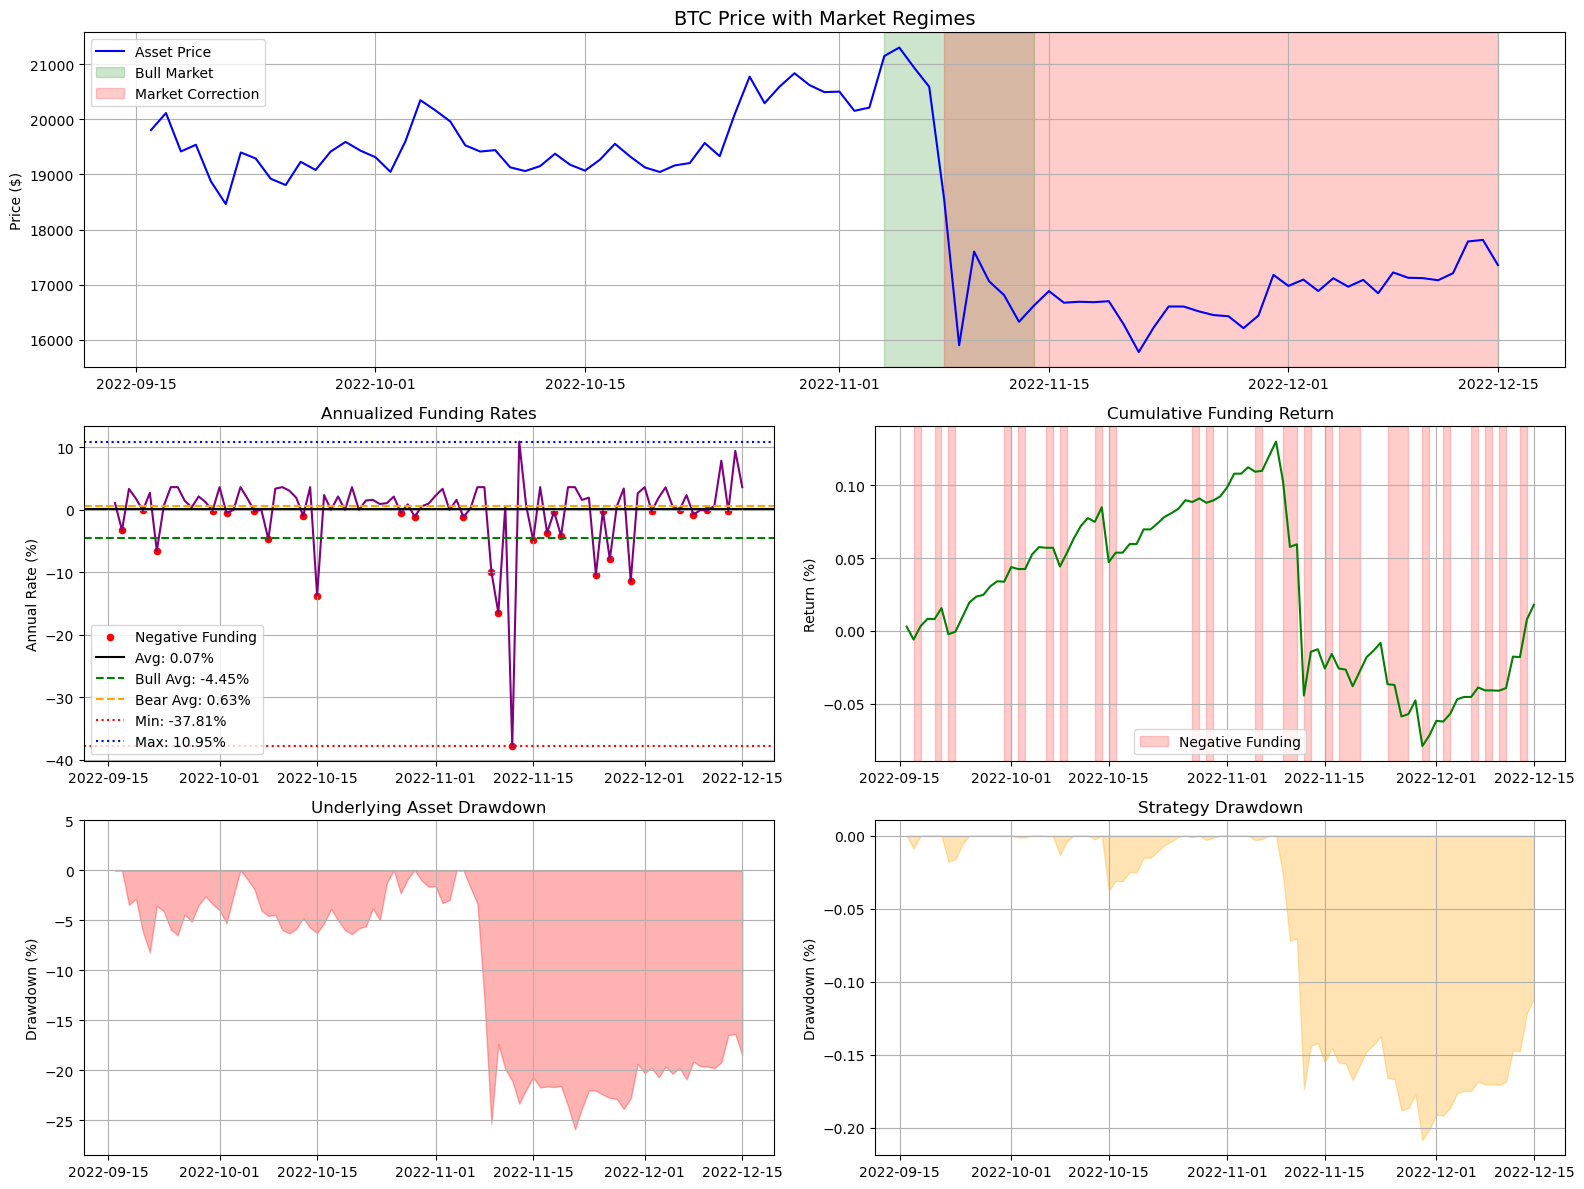

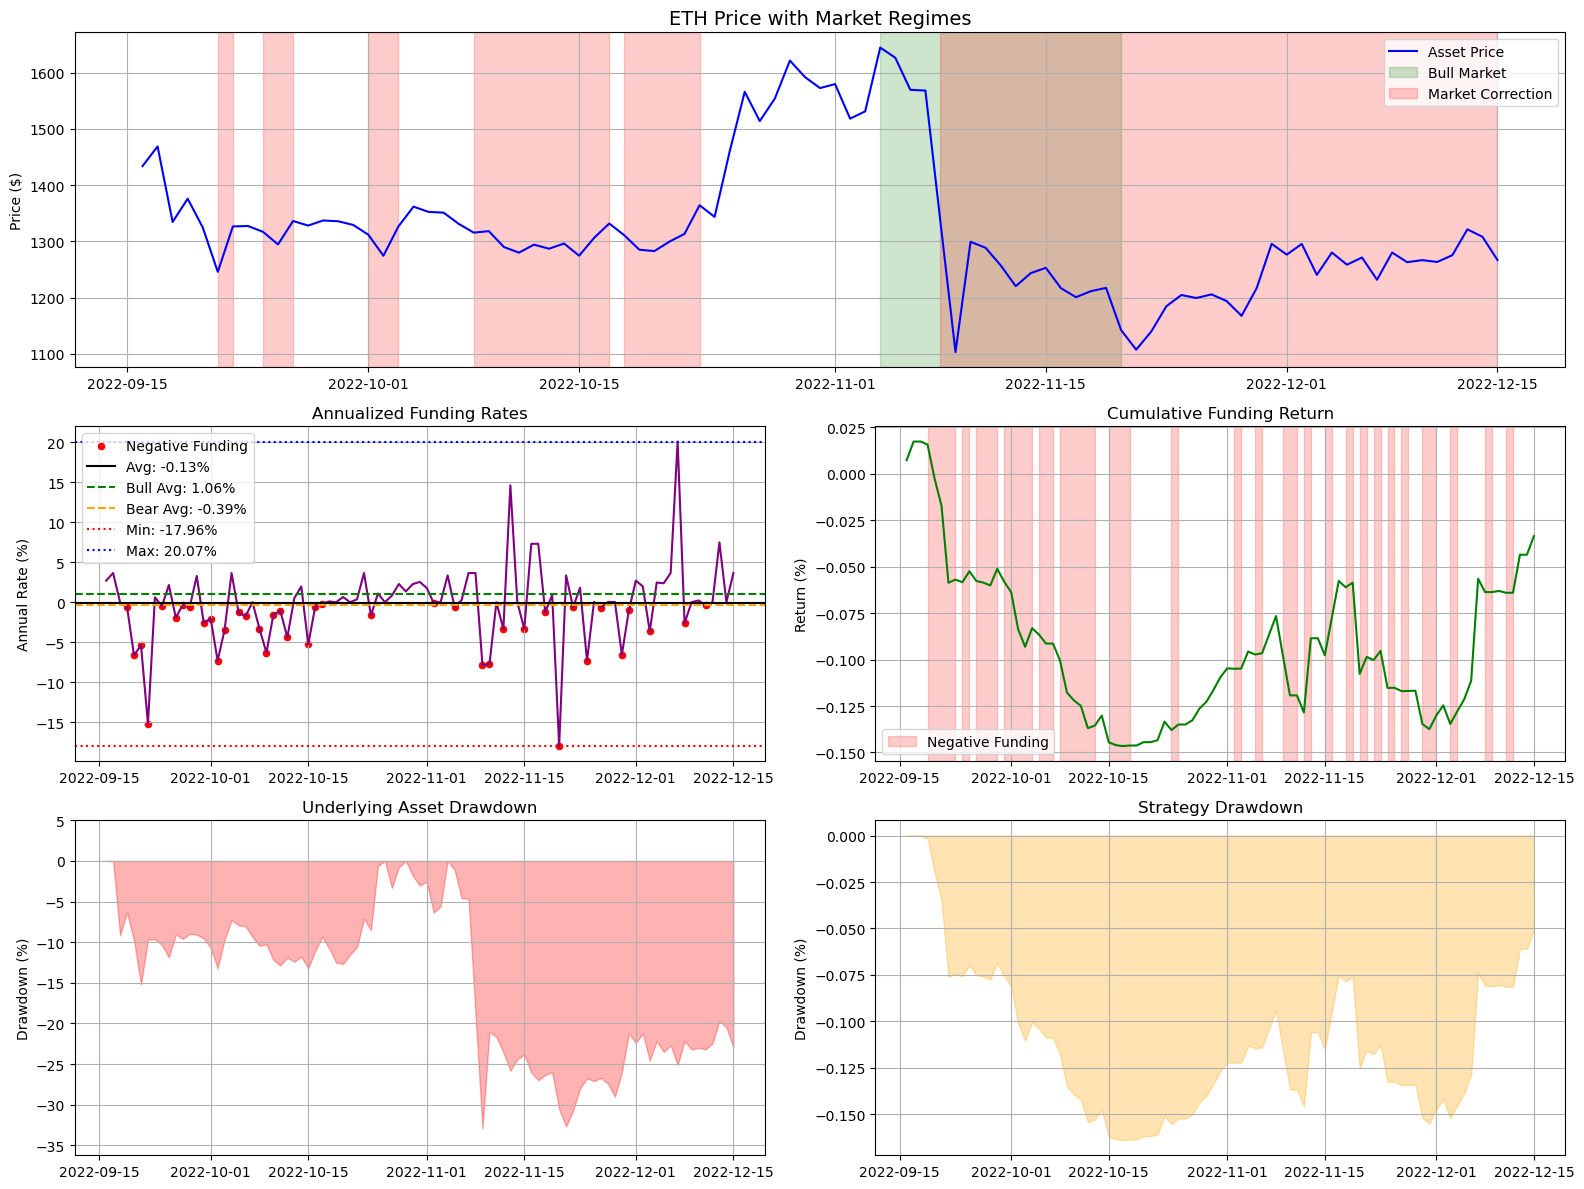

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2022-09-16,2022-09-16
2,End Date,2022-12-15,2022-12-15
3,Total Days,90,90
4,Years,0.2465753424657534,0.2465753424657534
5,Price Information,,None
6,Entry Price,19803.30,1433.90
7,Exit Price,17358.15,1266.74
8,Underlying Asset Performance,,None
9,Total Return,-12.35%,-11.66%


In [2]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2022-09-16_to_2022-12-16.csv'
futures_file_path = 'data/concat/futures_data_2022-09-16_to_2022-12-16.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


Post ETF Bull Run (2023-12-10_to_2024-03-10)

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2023-12-10_to_2024-03-09.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2023-12-10_to_2024-03-09.csv

Data separation complete!


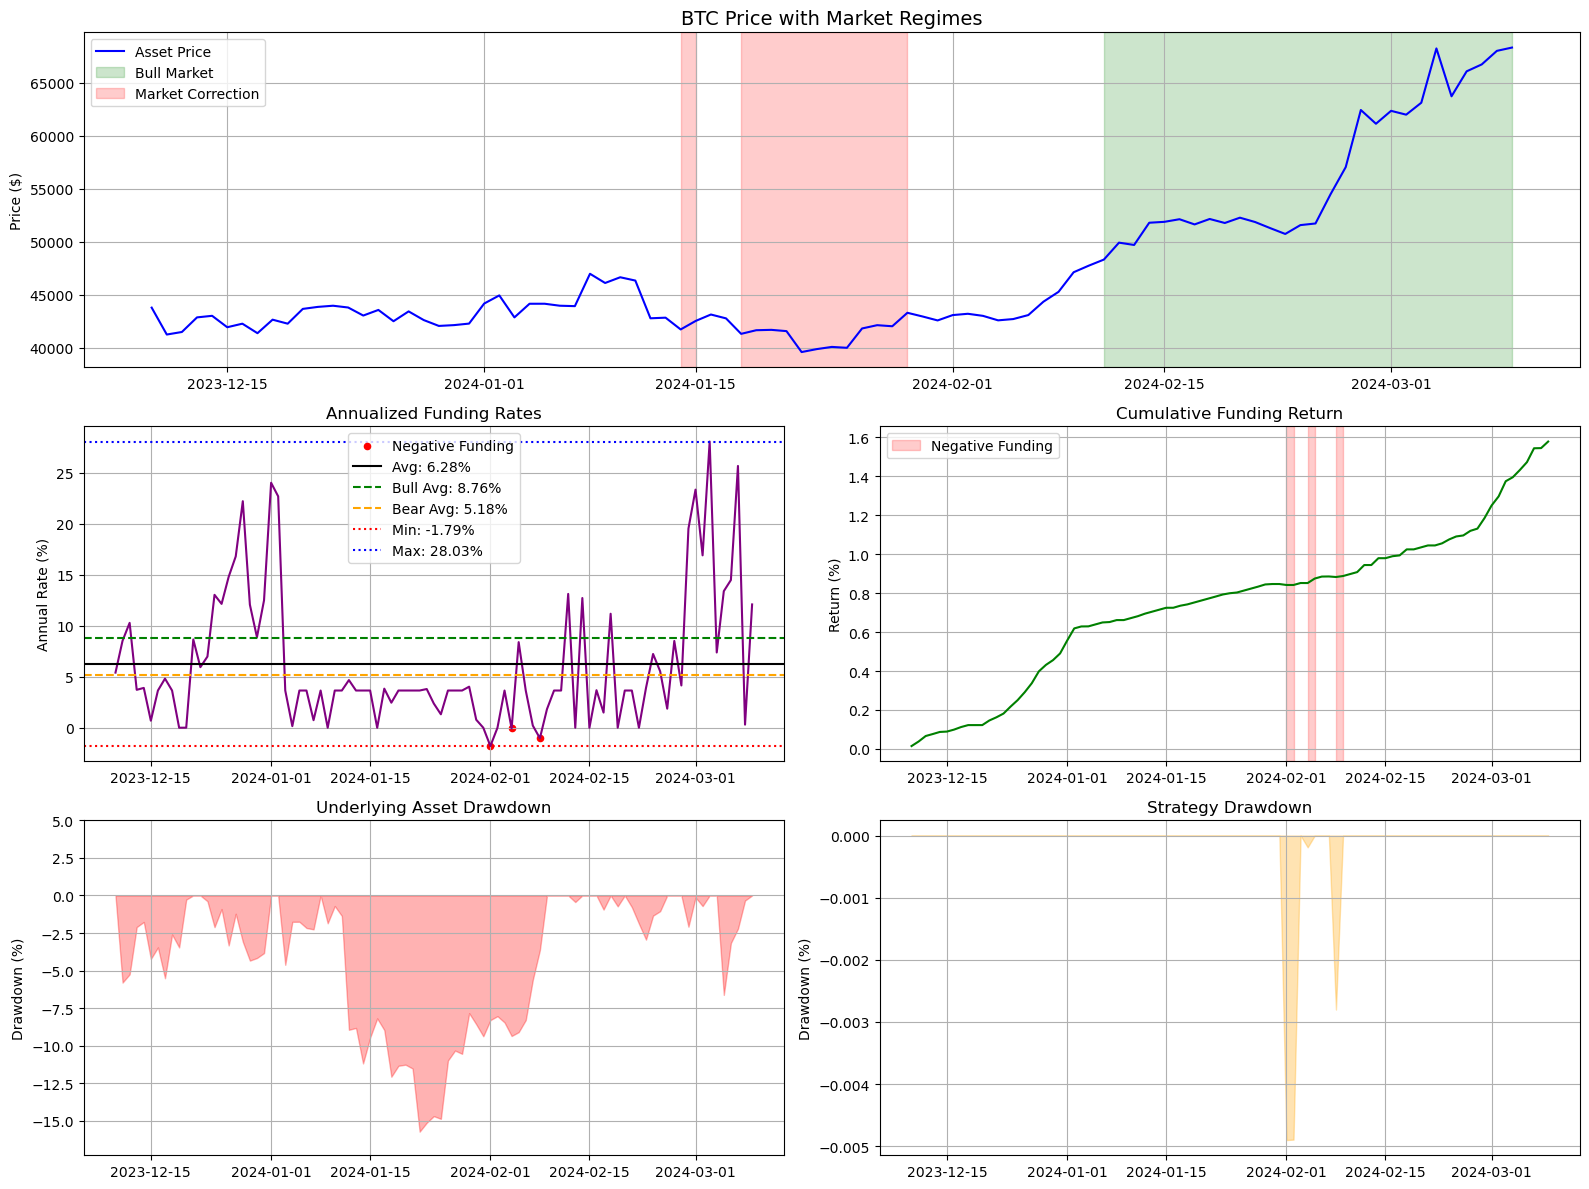

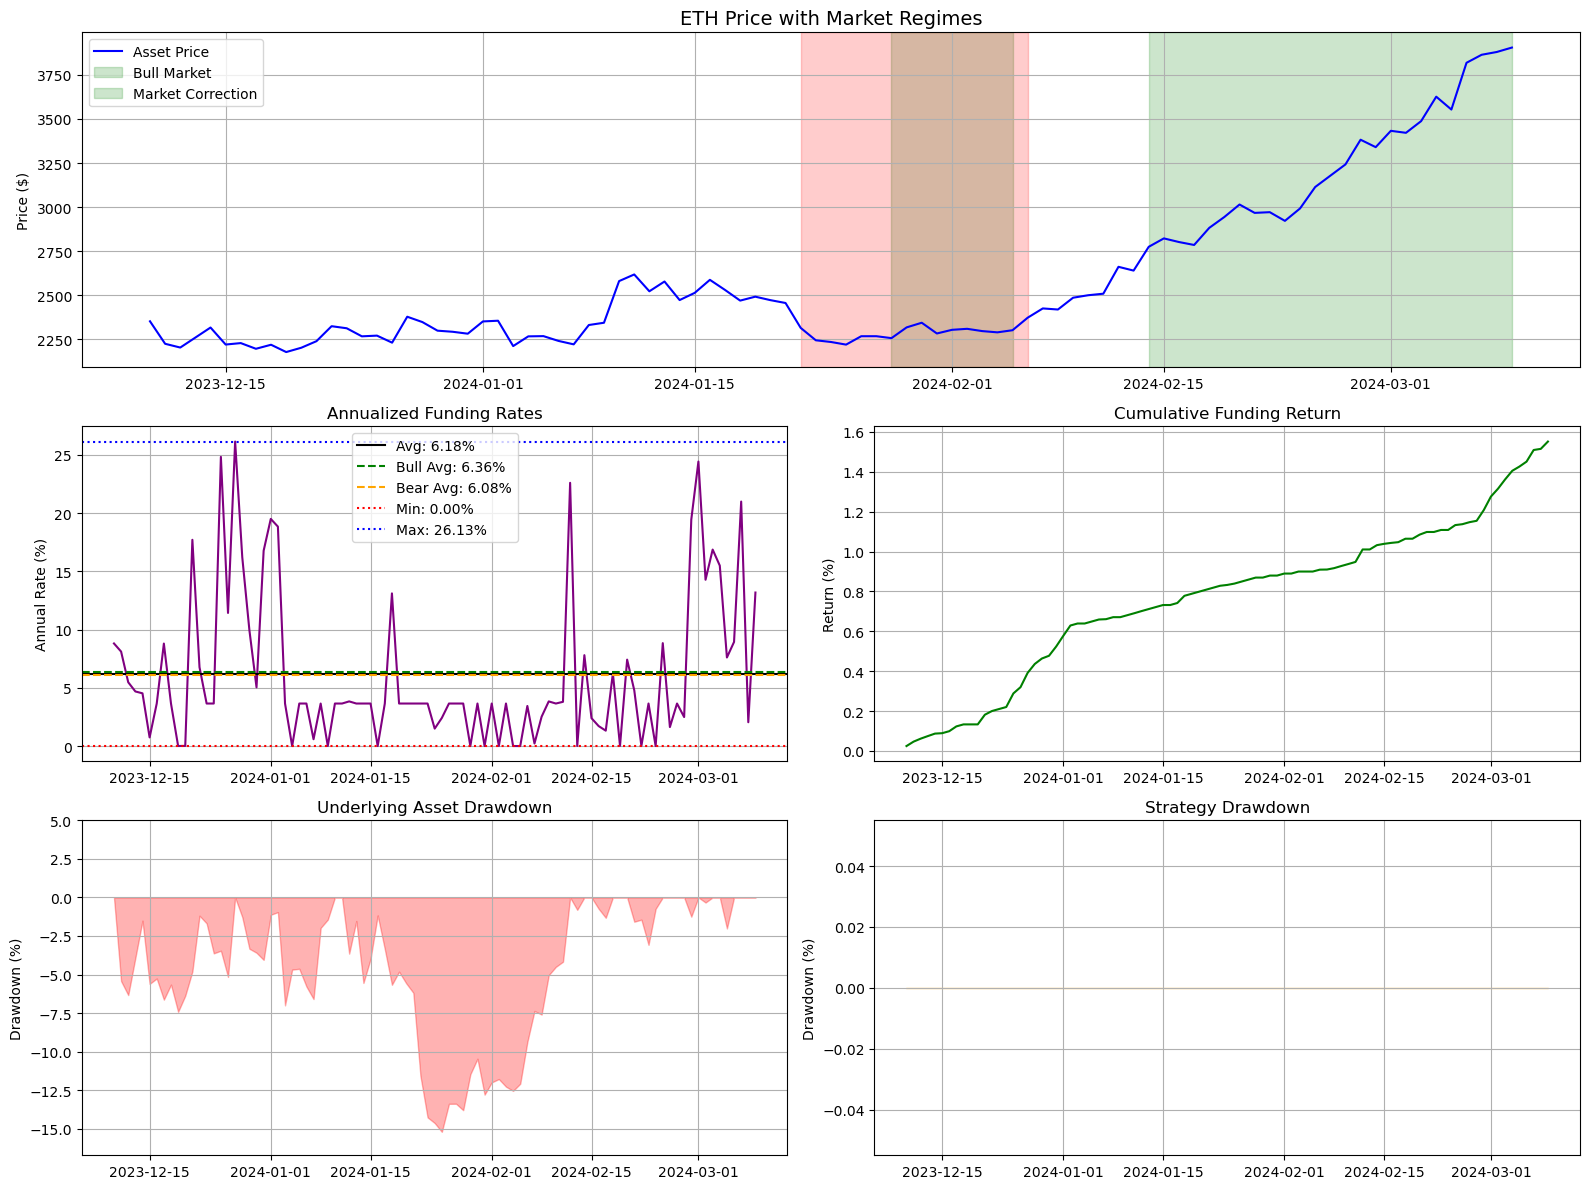

,Metric,BTC Value,ETH Value
0,Period Information,,None
1,Start Date,2023-12-10,2023-12-10
2,End Date,2024-03-09,2024-03-09
3,Total Days,90,90
4,Years,0.2465753424657534,0.2465753424657534
5,Price Information,,None
6,Entry Price,43789.51,2352.39
7,Exit Price,68316.00,3905.00
8,Underlying Asset Performance,,None
9,Total Return,56.01%,66.00%


In [3]:
from src.data.get_full_data_coinglass import load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd



# Example usage
spot_file_path = 'data/concat/spots_data_2023-12-10_to_2024-03-10.csv'
futures_file_path = 'data/concat/futures_data_2023-12-10_to_2024-03-10.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis:
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)
plot_carry_trade_performance(btc_results_df, btc_stats, title="BTC")

# For ETH analysis:
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)
plot_carry_trade_performance(eth_results_df, eth_stats, title="ETH")

# Display statistics in a nice table format
# For BTC only:
# btc_table = display_statistics_table(btc_stats)

# For comparison of BTC and ETH:
comparison_table = display_statistics_table(btc_stats, eth_stats)


Question 4 : Analyze Venue Switching for short leg

In [6]:
from src.data.get_full_data_coinglass import separate_by_exchange, create_venue_switching_report, plot_venue_switching_results, load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics, analyze_venue_switching_strategy


# Example usage
def analyze_carry_trade_across_venues(
    spot_df,
    futures_dfs_by_exchange,
    maker_fee=0.0,
    taker_fee=0.0,
    use_maker_fee=True,
    window_size=7
):
    """
    Analyze the carry trade strategy across different venues
    
    Parameters:
        spot_df: DataFrame with spot price data
        futures_dfs_by_exchange: Dictionary mapping exchange names to futures DataFrames
        maker_fee: Maker fee percentage
        taker_fee: Taker fee percentage
        use_maker_fee: Whether to use maker fee for calculations
        window_size: Number of days to look back for venue switching decisions
    """
    # Run the venue switching analysis
    result = analyze_venue_switching_strategy(
        spot_df=spot_df,
        futures_dfs=futures_dfs_by_exchange,
        window_size=window_size,
        maker_fee=maker_fee,
        taker_fee=taker_fee,
        use_maker_fee=use_maker_fee,
        position_size=1.0,
        verbose=True
    )
    
    # Plot the results
    plot_venue_switching_results(result)
    
    # Create report
    report = create_venue_switching_report(result)
    display(report)
    
    return result


# Separate the BTC and ETH DataFrames by exchange
btc_by_exchange = separate_by_exchange(btc_spot_df)
eth_by_exchange = separate_by_exchange(eth_spot_df)

# For BTC analysis
spot_exchange = "Binance"  # Choose your reference spot exchange
spot_df = btc_by_exchange[spot_exchange]

# Run the venue switching analysis for BTC
btc_venue_result = analyze_venue_switching_strategy(
    spot_df=spot_df,
    futures_dfs={exchange: df for exchange, df in btc_by_exchange.items() if exchange != spot_exchange},
    window_size=7,
    maker_fee=0.02,  # 0.02%
    taker_fee=0.05,  # 0.05%
    use_maker_fee=True
)

# Generate visualizations and report
plot_venue_switching_results(btc_venue_result, title="BTC Venue Switching Analysis")
btc_report = create_venue_switching_report(btc_venue_result)
display(btc_report)

# Repeat for ETH if desired


# Example of how you would call it
# futures_dfs_by_exchange = {
#     'Binance': binance_futures_df,
#     'FTX': ftx_futures_df,
#     'Bybit': bybit_futures_df,
#     'OKX': okx_futures_df
# }

# result = analyze_carry_trade_across_venues(
#     spot_df=spot_df,
#     futures_dfs_by_exchange=futures_dfs_by_exchange,
#     maker_fee=0.02,  # 0.02%
#     taker_fee=0.05,  # 0.05%
#     use_maker_fee=True,
#     window_size=7
# )


Input dataframe columns: ['date', 'timestamp', 'SP_open', 'SP_close', 'SP_high', 'SP_low', 'SP_vol', 'spot_exchange', 'spot_symbol']
First few rows sample:
        date   timestamp   SP_open  SP_close  SP_high   SP_low        SP_vol  \
0 2023-12-10  1702166400  43713.59  43789.51  44049.0  43563.0  8.304852e+08   
1 2023-12-11  1702252800  43789.50  41253.40  43804.5  40222.0  3.205541e+09   

  spot_exchange spot_symbol  
0       Binance     BTCUSDT  
1       Binance     BTCUSDT  
Using exchange column: 'spot_exchange'
Found 6 exchanges: ['Binance' 'Bitfinex' 'Bybit' 'Coinbase' 'Kraken' 'OKX']
Created dataframe for Binance with 91 rows
Created dataframe for Bitfinex with 91 rows
Created dataframe for Bybit with 91 rows
Created dataframe for Coinbase with 91 rows
Created dataframe for Kraken with 91 rows
Created dataframe for OKX with 91 rows
Input dataframe columns: ['date', 'timestamp', 'SP_open', 'SP_close', 'SP_high', 'SP_low', 'SP_vol', 'spot_exchange', 'spot_symbol']
First few ro

KeyError: "['FR_close_Bitfinex', 'perp_exchange_Bitfinex'] not in index"

Separating spot data...
BTC data saved to src/data/concat/BTC/btc_spot_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_spot_data_2023-12-10_to_2024-03-09.csv

Separating futures data...
BTC data saved to src/data/concat/BTC/btc_futures_data_2023-12-10_to_2024-03-09.csv
ETH data saved to src/data/concat/ETH/eth_futures_data_2023-12-10_to_2024-03-09.csv

Data separation complete!
Spot exchanges: ['Binance' 'Bitfinex' 'Bybit' 'Coinbase' 'Kraken' 'OKX']
Futures exchanges: ['Binance' 'BingX' 'Bitfinex' 'Bitget' 'Bitmex' 'Bybit' 'CoinEx'
 'Coinbase' 'Deribit' 'HTX' 'Kraken' 'OKX']
Created spot dataframe for Binance with 91 rows
Created spot dataframe for Bitfinex with 91 rows
Created spot dataframe for Bybit with 91 rows
Created spot dataframe for Coinbase with 91 rows
Created spot dataframe for Kraken with 91 rows
Created spot dataframe for OKX with 91 rows
Created futures dataframe for Binance with 91 rows
Created futures dataframe for BingX with 91 rows
Created

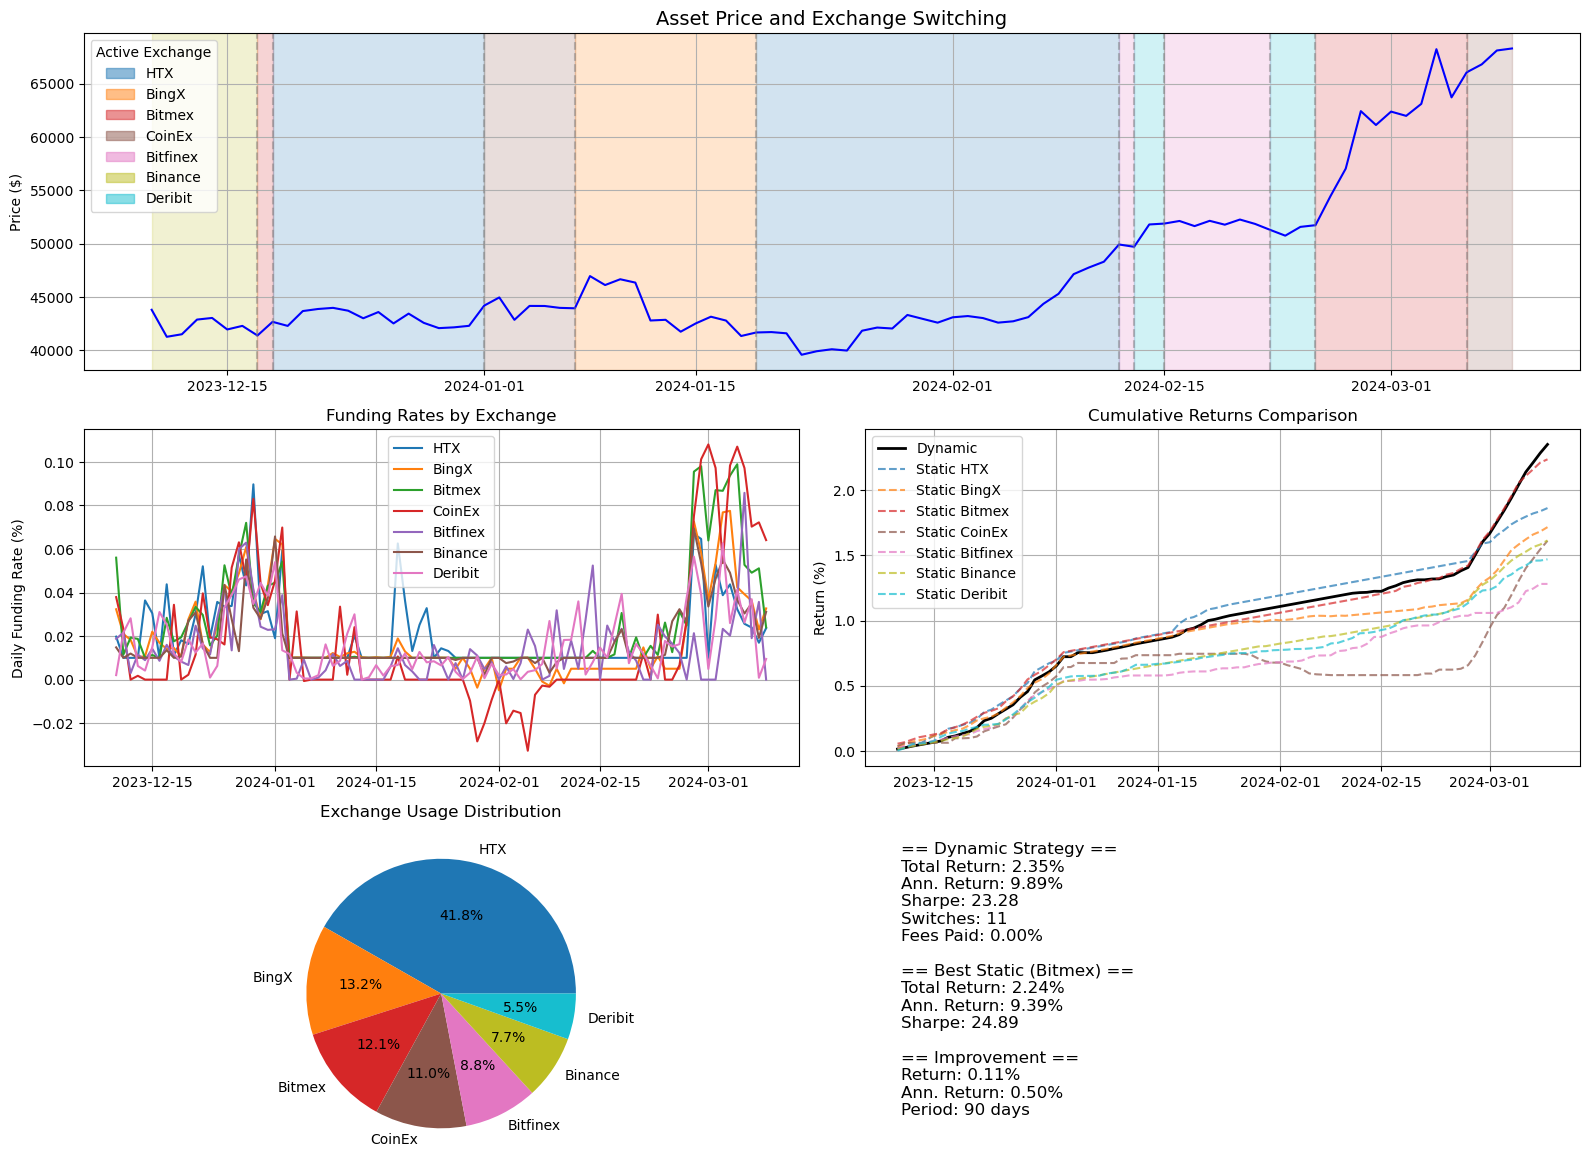

Spot exchanges: ['Binance' 'Bitfinex' 'Bybit' 'Coinbase' 'Kraken' 'OKX']
Futures exchanges: ['Binance' 'BingX' 'Bitfinex' 'Bitget' 'Bitmex' 'Bybit' 'CoinEx'
 'Coinbase' 'Deribit' 'HTX' 'Kraken' 'OKX']
Created spot dataframe for Binance with 91 rows
Created spot dataframe for Bitfinex with 91 rows
Created spot dataframe for Bybit with 91 rows
Created spot dataframe for Coinbase with 91 rows
Created spot dataframe for Kraken with 91 rows
Created spot dataframe for OKX with 91 rows
Created futures dataframe for Binance with 91 rows
Created futures dataframe for BingX with 91 rows
Created futures dataframe for Bitfinex with 91 rows
Created futures dataframe for Bitget with 91 rows
Created futures dataframe for Bitmex with 91 rows
Created futures dataframe for Bybit with 91 rows
Created futures dataframe for CoinEx with 91 rows
Created futures dataframe for Coinbase with 91 rows
Created futures dataframe for Deribit with 91 rows
Created futures dataframe for HTX with 91 rows
Created futures

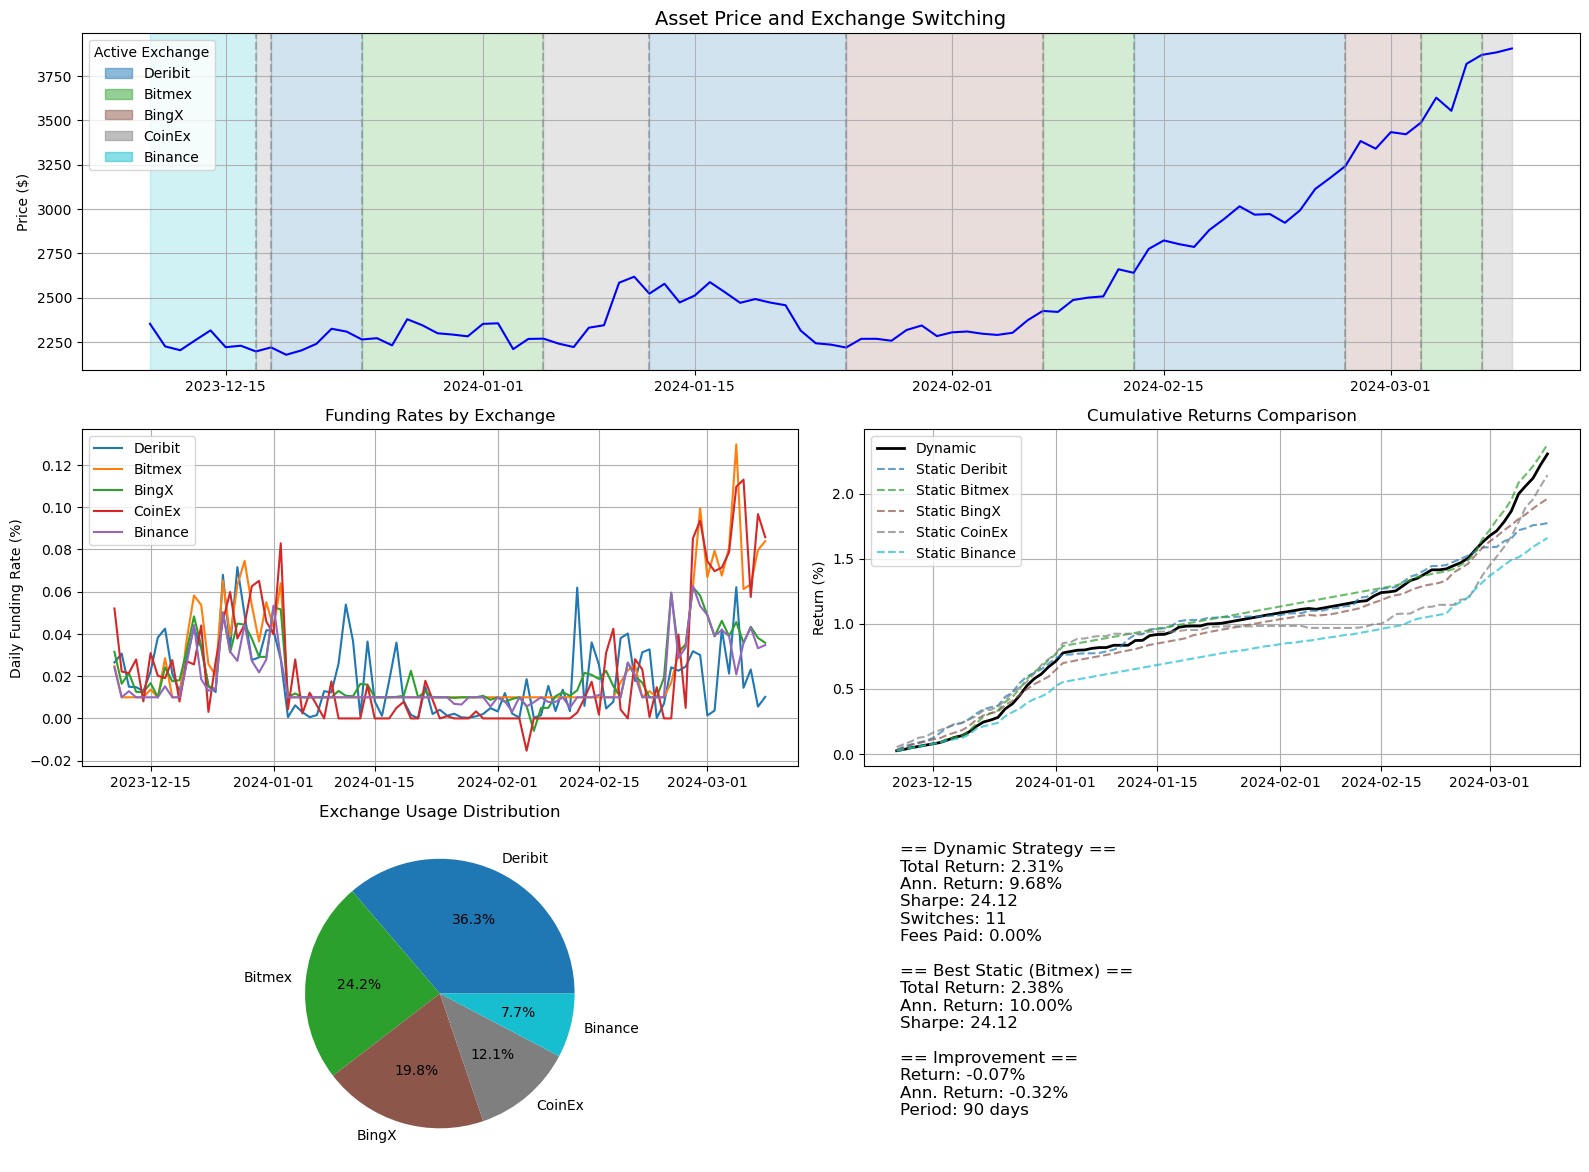

In [ ]:
from src.data.get_full_data_coinglass import analyze_multi_exchange_carry_trade, load_data_for_exchange_pair,display_statistics_table, process_data_files,  compute_funding_performance_multi_exchange, CoinGlassAPI, calculate_performance_metrics,plot_carry_trade_performance,  merge_and_compute_carry_trade, calculate_period_statistics
import matplotlib.pyplot as plt
import pandas as pd




# Example usage
spot_file_path = 'data/concat/spots_data_2023-12-10_to_2024-03-10.csv'
futures_file_path = 'data/concat/futures_data_2023-12-10_to_2024-03-10.csv'

separated_data = process_data_files(spot_file_path, futures_file_path)

# Now you can use the separated data for your delta neutral strategy
# For BTC:
btc_spot_df = separated_data['btc_spot']
btc_futures_df = separated_data['btc_futures']
btc_results_df = merge_and_compute_carry_trade(btc_spot_df, btc_futures_df, merge_on='timestamp')
btc_stats = calculate_period_statistics(btc_results_df)

# For ETH:
eth_spot_df = separated_data['eth_spot']
eth_futures_df = separated_data['eth_futures']
eth_results_df = merge_and_compute_carry_trade(eth_spot_df, eth_futures_df, merge_on='timestamp')
eth_stats = calculate_period_statistics(eth_results_df)


# For BTC analysis
btc_venue_result = analyze_multi_exchange_carry_trade(
    spot_df=btc_spot_df,
    futures_df=btc_futures_df,
    maker_fee=0,  # 0.02%
    taker_fee=0   # 0.05%
)

# For ETH analysis
eth_venue_result = analyze_multi_exchange_carry_trade(
    spot_df=eth_spot_df,
    futures_df=eth_futures_df,
    maker_fee=0,  # 0.02%
    taker_fee=0   # 0.05%
)
